In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

1) Загрузите данные из файла abalone.csv. Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.

In [2]:
data = pd.read_csv('abalone.csv')
data.head(2)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


2) Преобразуйте признак Sex в числовой: значение F должно перейти в -1, I — в 0, M — в 1. Если вы используете Pandas, то подойдет следующий код: data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [3]:
data['Sex'] = data['Sex'].map({'F': -1, 'I': 0, 'M': 1})

3) Разделите содержимое файлов на признаки и целевую переменную. В последнем столбце записана целевая переменная, в остальных — признаки.

In [4]:
X = data.drop(['Rings'], axis=1)
y = data['Rings']

4) Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 (не забудьте выставить "random_state=1" в конструкторе). Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры "random_state=1" и "shuffle=True" при создании генератора кросс-валидации sklearn.cross_validation.KFold. В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).

In [5]:
%%time
kf = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []
for i in range(1, 51):
    rfg = RandomForestRegressor(n_estimators=i, random_state=1)
    scores.append(np.mean(cross_val_score(rfg, X, y, cv=kf, scoring='r2')))

Wall time: 2min 23s


5) Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52. Это количество и будет ответом на задание.

In [6]:
for n, score in enumerate(scores):
    if score > 0.52:
        print("Min n_estimators =", n + 1)
        break
# n +1 т.к. первый индекс = 0

Min n_estimators = 22


6) Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?

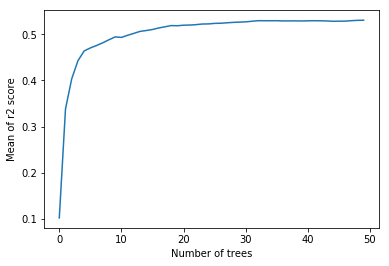

In [7]:
plt.plot(scores)
plt.xlabel('Number of trees')
plt.ylabel('Mean of r2 score');